همملرن یک کتابخانه پایتون است که مدل های  مارکوف پنهان را در پایتون پیاده سازی می کند همملرن سه مدل را ارائه می دهد - یک مدل انتشار چند جمله ای، یک مدل انتشار گاوسی و یک مدل انتشار مخلوط گاوسی،  این کتابخانه امکان اجرای مدل های  سفارشی را فراهم می کند.

In [1]:
pip install hmmlearn==0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hmmlearn: filename=hmmlearn-0.2.1-cp38-cp38-linux_x86_64.whl size=527406 sha256=c94962dc5b899f826fc3223093bf4bfed99a348265c37a577a998757cb5ccd5b
  Stored in directory: /root/.cache/pip/wheels/bb/e4/fb/78af2c8d35edbd08ae4fca6c2989f82ed5c803bf93da076926
Successfully built hmmlearn


در ابتدا کتابخانه های لازم و همچنین داده ها را به پایتون وارد می کنیم و داده های با کمکن کتابخانه متپلات لیب مصور می کنیم. از آنجا که برخورد با تغییر قیمت به جای خود قیمت واقعی منجر به مدل سازی بهتر شرایط واقعی بازار می شود درنتیجه تغییرات روزانه قیمت طلا را محاسبه کرده و داده ها را از سال 2008 به بعد محدود کرده ایم. 

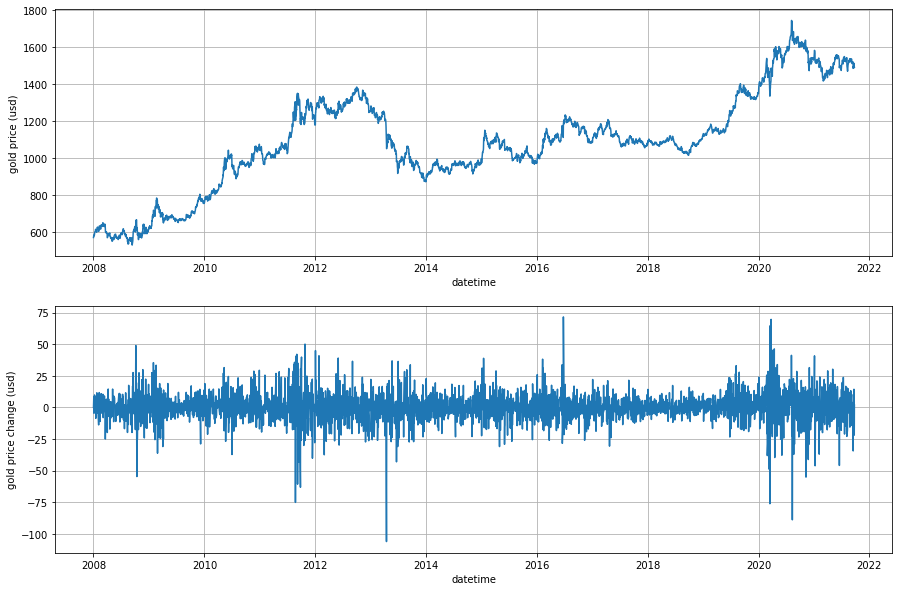

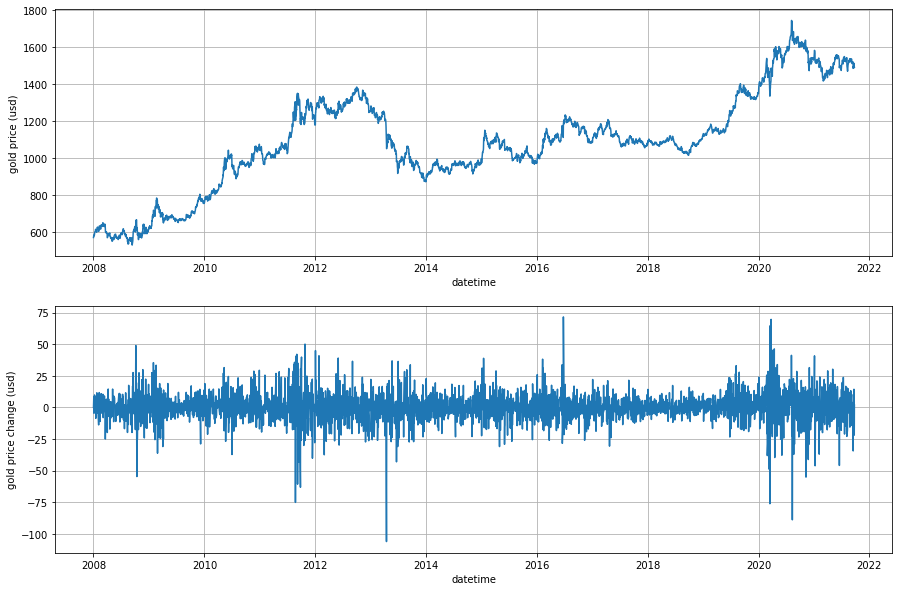

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()

# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()

# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

به‌جای مدل‌سازی مستقیم قیمت طلا، تغییرات روزانه قیمت طلا را مدل‌سازی می‌کنیم این مسئله به ما امکان می‌دهد وضعیت بازار را بهتر درک کنیم . تغییرات روزانه قیمت طلا را با مدل  گاوسی با  حالت پنهان مطابقت دادیم. دلیل استفاده از 3 حالت پنهان این است که ما حداقل 3 روند مختلف را در تغییرات روزانه انتظار داریم (نوسان کم، متوسط و زیاد).

In [3]:
# Use the daily change in gold price as the observed measurements X.
X = data[["gold_price_change"]].values# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

In [4]:
print("Unique states:")
print(states)

Unique states:
[0 1 2]


In [5]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[1.00000000e+00 4.28952054e-24 1.06227453e-46]


In [6]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[8.56499275e-01 1.42858023e-01 6.42701428e-04]
 [2.43257082e-01 7.02528333e-01 5.42145847e-02]
 [1.33435298e-03 1.67318160e-01 8.31347487e-01]]


In [7]:
print("\nGaussian distribution means:")
print(model.means_)


Gaussian distribution means:
[[0.27988823]
 [0.2153654 ]
 [0.26501033]]


In [8]:
print("\nGaussian distribution covariances:")
print(model.covars_)


Gaussian distribution covariances:
[[[ 33.89296208]]

 [[142.59176749]]

 [[518.65294334]]]


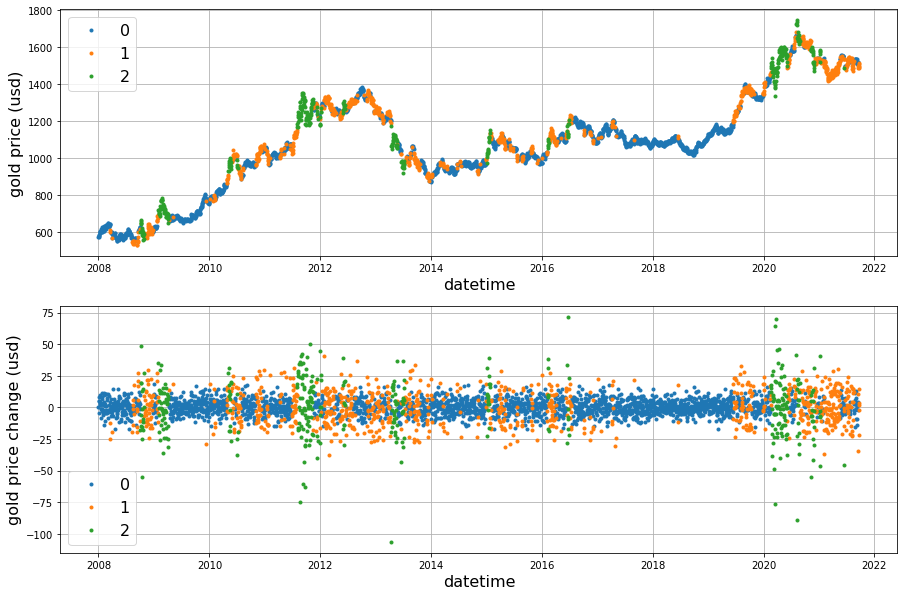

In [9]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()